In [1]:
#Load the data
import pandas as pd
%matplotlib inline

df = pd.read_csv("https://raw.githubusercontent.com/stephenleo/sagemaker-deployment/main/data/final_project_bank.csv")

print(df.shape)
df.head()

(41188, 20)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,NaN,telephone,may,mon,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,NaN,may,mon,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [2]:
#drop the duplicates
df.drop_duplicates(keep='first',inplace=True,ignore_index=True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,NaN,telephone,may,mon,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,NaN,may,mon,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.shape

(39967, 20)

In [4]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df.drop(columns=['y'])
y = df['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Concatenate features and target variable for training and testing sets
train_df = pd.concat([X_train, y_train], axis=1)
big_test_df = pd.concat([X_test, y_test], axis=1)


In [5]:
import sagemaker
session = sagemaker.Session()
bucket = session.default_bucket()
print(bucket)

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml
sagemaker-us-east-1-635439539142


In [6]:
big_test_df.to_json('../data/bank_big_test_json.json',orient='records',lines=True,index=False)
test_path = session.upload_data(path='../data/bank_big_test_json.json', bucket=bucket, key_prefix = 'akash/bank-prediction')

In [7]:
test_path

's3://sagemaker-us-east-1-635439539142/akash/bank-prediction/bank_big_test_json.json'

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)
/opt/conda/lib/python3.10/site-packages/ydata_profiling/model/missing.py:78: UserWarning: There was an attempt to generate the Heatmap missing values diagrams, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(missing_diagrams={"Heatmap": False}`)
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: '--'')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

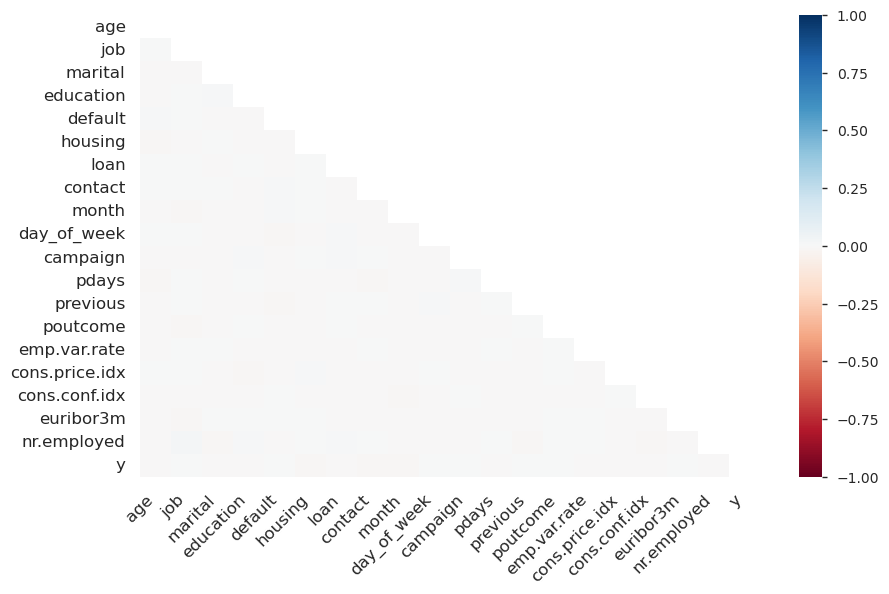

In [8]:
from ydata_profiling import ProfileReport
profile = ProfileReport(train_df,correlations={"auto": {"calculate": False}},missing_diagrams={"Heatmap": False})
profile.to_file('profile_report_bank.html')

In [8]:
#Checking the count of the missing values percentage, there are very few missing values there in the dataset
train_df.isnull().sum()/len(train_df)*100

age               1.054475
job               1.208178
marital           1.065199
education         1.086646
default           1.018730
housing           0.954389
loan              1.176008
contact           1.047326
month             1.025879
day_of_week       1.050901
campaign          1.065199
pdays             1.158136
previous          1.043752
poutcome          1.115242
emp.var.rate      1.072348
cons.price.idx    0.940092
cons.conf.idx     1.029454
euribor3m         1.068773
nr.employed       1.154561
y                 0.965113
dtype: float64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39967 entries, 0 to 39966
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             39547 non-null  float64
 1   job             39484 non-null  object 
 2   marital         39554 non-null  object 
 3   education       39543 non-null  object 
 4   default         39576 non-null  object 
 5   housing         39588 non-null  object 
 6   loan            39512 non-null  object 
 7   contact         39527 non-null  object 
 8   month           39547 non-null  object 
 9   day_of_week     39531 non-null  object 
 10  campaign        39554 non-null  float64
 11  pdays           39518 non-null  float64
 12  previous        39549 non-null  float64
 13  poutcome        39537 non-null  object 
 14  emp.var.rate    39549 non-null  float64
 15  cons.price.idx  39598 non-null  float64
 16  cons.conf.idx   39563 non-null  float64
 17  euribor3m       39539 non-null 

In [10]:
# Separate categorical and numerical columns
categorical_cols = train_df.select_dtypes(include=['object']).columns
numerical_cols = train_df.select_dtypes(include=['float64']).columns

# Impute categorical columns with mode
for col in categorical_cols:
    mode_val = train_df[col].mode()[0]
    train_df[col].fillna(mode_val, inplace=True)

# Impute numerical columns with mean
for col in numerical_cols:
    mean_val = train_df[col].mean()
    train_df[col].fillna(mean_val, inplace=True)

#Checking the count of the missing values percentage, there are very few missing values there in the dataset
train_df.isnull().sum()/len(train_df)*100

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

In [11]:
train_df['y'].value_counts()

y
no     24770
yes     3206
Name: count, dtype: int64

In [12]:
from sklearn.utils import resample


# Separate majority and minority classes
majority_class = train_df[train_df['y'] == 'no']
minority_class = train_df[train_df['y'] == 'yes']

# Determine the size of the minority class
minority_size = len(minority_class)

# Sample a subset from the majority class
majority_undersampled = resample(majority_class,
                                 replace=False,  # sample without replacement
                                 n_samples=minority_size,  # match the size of the minority class
                                 random_state=42)  # reproducible results

# Combine minority class with downsampled majority class
undersampled_df = pd.concat([majority_undersampled, minority_class])

# Shuffle the DataFrame to mix the data
undersampled_df = undersampled_df.sample(frac=1, random_state=42)
# Now undersampled_df contains the balanced dataset
undersampled_df.shape

(6412, 20)

In [13]:
train_df = undersampled_df
train_df['y'] = train_df["y"].apply(lambda x: 1 if "yes" in x else 0)
train_df['y'].value_counts()

y
0    3206
1    3206
Name: count, dtype: int64

In [14]:
train_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
21954,37.000000,admin.,single,university.degree,no,no,yes,cellular,aug,mon,8.0,999.0,0.0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0
39439,46.000000,services,married,university.degree,no,yes,no,cellular,sep,wed,1.0,999.0,0.0,nonexistent,-1.1,94.199,-37.5,0.880,4963.6,1
32703,40.080597,services,single,professional.course,no,yes,no,cellular,may,wed,1.0,999.0,0.0,nonexistent,-1.8,92.893,-46.2,1.281,5099.1,0
24938,44.000000,admin.,single,high.school,no,yes,no,cellular,nov,wed,1.0,999.0,1.0,failure,-0.1,93.200,-42.0,4.120,5195.8,0
39441,31.000000,student,single,unknown,no,unknown,unknown,cellular,sep,wed,2.0,6.0,2.0,success,-1.1,94.199,-37.5,0.880,4963.6,1


In [15]:
train_df.drop(['emp.var.rate','euribor3m','nr.employed','previous','poutcome','pdays'],inplace=True,axis=1)
train_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,cons.price.idx,cons.conf.idx,y
21954,37.000000,admin.,single,university.degree,no,no,yes,cellular,aug,mon,8.000000,93.444,-36.1,0
39439,46.000000,services,married,university.degree,no,yes,no,cellular,sep,wed,1.000000,94.199,-37.5,1
32703,40.080597,services,single,professional.course,no,yes,no,cellular,may,wed,1.000000,92.893,-46.2,0
24938,44.000000,admin.,single,high.school,no,yes,no,cellular,nov,wed,1.000000,93.200,-42.0,0
39441,31.000000,student,single,unknown,no,unknown,unknown,cellular,sep,wed,2.000000,94.199,-37.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22530,47.000000,admin.,married,university.degree,no,yes,no,cellular,aug,wed,10.000000,93.444,-36.1,1
39679,66.000000,retired,married,basic.4y,no,yes,no,telephone,oct,fri,2.613737,94.601,-49.5,1
3185,49.000000,blue-collar,divorced,basic.4y,unknown,no,no,telephone,may,thu,2.000000,93.994,-36.4,1
32297,28.000000,technician,single,basic.9y,no,yes,no,cellular,may,tue,1.000000,92.893,-46.2,1


In [16]:
# Separate features (X) and target variable (y)
X = train_df.drop(columns=['y'])
y = train_df['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Concatenate features and target variable for training and testing sets
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)
train_df.to_csv('../data/train_data_bank_pred.csv')
test_df.to_csv('../data/test_data_bank_pred.csv')

In [17]:
train_path = session.upload_data(path='../data/train_data_bank_pred.csv', bucket=bucket, key_prefix = 'akash/bank-prediction')
test_path = session.upload_data(path='../data/test_data_bank_pred.csv', bucket=bucket, key_prefix = 'akash/bank-prediction')
print(f'train path: {train_path}')
print(f'test path: {test_path}')

train path: s3://sagemaker-us-east-1-635439539142/akash/bank-prediction/train_data_bank_pred.csv
test path: s3://sagemaker-us-east-1-635439539142/akash/bank-prediction/test_data_bank_pred.csv


In [18]:
%%writefile train.py
import argparse
import numpy as np
import os
import pandas as pd
import joblib
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from category_encoders import CatBoostEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import ast
from sklearn.neural_network import MLPClassifier

def main():
    parser = argparse.ArgumentParser()
    parser.add_argument("--model_dir", type=str, default=os.environ.get("SM_MODEL_DIR"))
    parser.add_argument("--rfc_n_estimators", type=int, default=100)
    parser.add_argument("--rfc_min_samples_split", type=float, default=0.05)
    parser.add_argument("--rfc_criterion", type=str, default="gini")
    parser.add_argument("--logistic_max_iter", type=int, default=500)
    parser.add_argument("--svm_kernel", type=str, default="rbf")
    parser.add_argument("--xgb_max_depth", type=int, default=3)
    parser.add_argument("--nn_hidden_layer_sizes", type=str, default="(100,)")
    args, _ = parser.parse_known_args()
    
    # Read the data
    train_df = pd.read_csv('s3://sagemaker-us-east-1-635439539142/akash/bank-prediction/train_data_bank_pred.csv')  # Path to your train data file
    test_df = pd.read_csv('s3://sagemaker-us-east-1-635439539142/akash/bank-prediction/test_data_bank_pred.csv')   # Path to your test data file
    
    X_train = train_df.drop("y", axis=1)
    y_train = train_df["y"]
    X_test = test_df.drop("y", axis=1)
    y_test = test_df["y"] 
    
    def data_type(dataset):
        """
        Function to identify the numerical and categorical data columns
        :param dataset: Dataframe
        :return: list of numerical and categorical columns
        """
        numerical = []
        categorical = []
        for i in dataset.columns:
            if dataset[i].dtype == 'int64' or dataset[i].dtype == 'float64':
                numerical.append(i)
            else:
                categorical.append(i)
        return numerical, categorical

    numerical, categorical = data_type(X_train)
    
    # Identifying the binary columns and ignoring them from scaling
    def binary_columns(df):
        """
        Generates a list of binary columns in a dataframe.
        """
        binary_cols = []
        for col in df.select_dtypes(include=['int', 'float']).columns:
            unique_values = df[col].unique()
            if np.in1d(unique_values, [0, 1]).all():
                binary_cols.append(col)
        return binary_cols

    binary_cols = binary_columns(X_train)

    # Remove the binary columns from the numerical columns
    numerical = [i for i in numerical if i not in binary_cols]
    
    # Define your encoder
    ct = ColumnTransformer([
        ("CatBoostEncoding", CatBoostEncoder(), categorical),
        ("Scaling", StandardScaler(), numerical)
    ])
    
    # Define classifiers
    rfc = RandomForestClassifier(n_estimators=args.rfc_n_estimators, 
                                  min_samples_split=args.rfc_min_samples_split, 
                                  criterion=args.rfc_criterion)
    
    logistic = LogisticRegression(penalty='l2', max_iter=args.logistic_max_iter)
    
    svm_rbf = SVC(kernel=args.svm_kernel)
    
    xgb_classifier = xgb.XGBClassifier(max_depth=args.xgb_max_depth)

    # Convert hidden_layer_sizes from string to tuple of integers
    hidden_layer_sizes = ast.literal_eval(args.nn_hidden_layer_sizes)
    
    nn_classifier = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes)
    
    # Create pipelines for classifiers with your encoder
    rfc_pipeline = Pipeline([
        ("Data Transformations", ct),
        ("Random Forest", rfc)
    ])

    logistic_pipeline = Pipeline([
        ("Data Transformations", ct),
        ("Logistic Regression", logistic)
    ])

    svm_rbf_pipeline = Pipeline([
        ("Data Transformations", ct),
        ("SVM with RBF kernel", svm_rbf)
    ])
    
    xgb_pipeline = Pipeline([
        ("Data Transformations", ct),
        ("XGBoost Classifier", xgb_classifier)
    ])
    
    nn_pipeline = Pipeline([
        ("Data Transformations", ct),
        ("Neural Network Classifier", nn_classifier)
    ])
    
    # Fit and evaluate each pipeline
    for pipeline, name in [(rfc_pipeline, 'Random Forest'), 
                           (logistic_pipeline, 'Logistic Regression'), 
                           (svm_rbf_pipeline, 'SVM with RBF kernel'),
                           (xgb_pipeline, 'XGBoost Classifier'),
                           (nn_pipeline, 'Neural Network Classifier')]:
        pipeline.fit(X_train, y_train)
        train_accuracy = pipeline.score(X_train, y_train)
        test_accuracy = pipeline.score(X_test, y_test)
        print(f"{name} Training Accuracy: {test_accuracy:.4f}")
        
        # Save the model
        model_save_path = os.path.join(args.model_dir, f"{name.lower().replace(' ', '_')}_model.joblib")
        joblib.dump(pipeline, model_save_path)
        print(f"Model Saved At: {model_save_path}")

if __name__ == "__main__":
    main()

Overwriting train.py


In [19]:
%%writefile requirements.txt
pandas
xgboost
scikit-learn
fsspec
category_encoders
s3fs
botocore==1.27.18

Overwriting requirements.txt


In [24]:
!python train.py --model_dir ../models/ --rfc_n_estimators 100 --rfc_min_samples_split 0.05 --rfc_criterion gini --logistic_max_iter 1000 --svm_kernel rbf --xgb_max_depth 3 --nn_hidden_layer_sizes !python train.py --model_dir ../models/ --rfc_n_estimators 100 --rfc_min_samples_split 0.05 --rfc_criterion gini --logistic_max_iter 1000 --svm_kernel rbf --xgb_max_depth 3 --nn_hidden_layer_sizes "(25,11,75,5,3,100)"

Random Forest Training Accuracy: 0.7583
Model Saved At: ../models/random_forest_model.joblib
Logistic Regression Training Accuracy: 0.7256
Model Saved At: ../models/logistic_regression_model.joblib
SVM with RBF kernel Training Accuracy: 0.7531
Model Saved At: ../models/svm_with_rbf_kernel_model.joblib
XGBoost Classifier Training Accuracy: 0.7620
Model Saved At: ../models/xgboost_classifier_model.joblib
Neural Network Classifier Training Accuracy: 0.7443
Model Saved At: ../models/neural_network_classifier_model.joblib


In [26]:
from sagemaker.sklearn.estimator import SKLearn
from sagemaker import get_execution_role

sklearn_estimator = SKLearn(
    base_job_name="pipeline-run",
    framework_version="0.23-1",
    entry_point="train.py",
    dependencies=["requirements.txt"],  # Include the requirements file if needed
    hyperparameters={
        "rfc_n_estimators": 100,
        "rfc_min_samples_split": 0.05,
        "rfc_criterion": "gini",
        "logistic_max_iter": 1000,
        "svm_kernel": "rbf",
        "xgb_max_depth": 3,
        "nn_hidden_layer_sizes": "(25,11,75,5,3,100)"  # Pass as a string representing a tuple
    },
    instance_count=1,
    instance_type="ml.m5.large",
    use_spot_instances=True,
    max_wait=600,
    max_run=600,
    role=get_execution_role(),
)

sklearn_estimator.fit()


sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml


INFO:sagemaker:Creating training-job with name: pipeline-run-2024-03-03-19-03-44-064


Using provided s3_resource
2024-03-03 19:03:44 Starting - Starting the training job...
2024-03-03 19:04:00 Starting - Preparing the instances for training...
2024-03-03 19:04:33 Downloading - Downloading input data...
2024-03-03 19:04:59 Downloading - Downloading the training image...
2024-03-03 19:05:39 Training - Training image download completed. Training in progress..2024-03-03 19:05:43,300 sagemaker-containers INFO     Imported framework sagemaker_sklearn_container.training
2024-03-03 19:05:43,305 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2024-03-03 19:05:43,357 sagemaker_sklearn_container.training INFO     Invoking user training script.
2024-03-03 19:05:43,584 sagemaker-training-toolkit INFO     Installing dependencies from requirements.txt:
/miniconda3/bin/python -m pip install -r requirements.txt
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.0/143.0 kB 32.

In [27]:
import boto3
sm_client = boto3.client("sagemaker")
training_job_name = sklearn_estimator.latest_training_job.name
model_artifact = sm_client.describe_training_job(
    TrainingJobName = training_job_name
)["ModelArtifacts"]["S3ModelArtifacts"]

print(f"Training job name : {training_job_name}")
print(f"Model storage location : {model_artifact}")

Training job name : pipeline-run-2024-03-03-19-03-44-064
Model storage location : s3://sagemaker-us-east-1-635439539142/pipeline-run-2024-03-03-19-03-44-064/output/model.tar.gz


In [35]:
import sagemaker
from sagemaker.sklearn.estimator import SKLearn
from sagemaker.tuner import HyperparameterTuner, IntegerParameter, CategoricalParameter, ContinuousParameter
import itertools

# Define role
role = sagemaker.get_execution_role()
# Define the SKLearn estimator with the modified train.py script
sklearn_estimator = SKLearn(
    entry_point="train.py",  # Make sure this points to the modified train.py script
    source_dir=".",  # Directory containing your training script and dependencies
    role=role,
    instance_type="ml.m5.large",
    instance_count=1,
    framework_version="0.23-1"
)

# Define hyperparameter ranges
hyperparameter_ranges = {
    "rfc_n_estimators": IntegerParameter(50, 150),
    "rfc_min_samples_split": ContinuousParameter(0.01, 0.5),
    "rfc_criterion": CategoricalParameter(["gini", "entropy"]),
    "logistic_max_iter": IntegerParameter(100, 1000),
    "svm_kernel": CategoricalParameter(["linear", "poly", "rbf", "sigmoid"]),
    "xgb_max_depth": IntegerParameter(3, 10),
    "nn_hidden_layer_sizes": CategoricalParameter([(25,50,75,100),(10,20,30,40,50),(60,70,80,90,100)])
}

# Define the objective metric name and type
objective_metric_name = 'Training_Accuracy'
objective_type = 'Maximize'

# Define the metric definitions function
def generate_metric_definitions():
    return [
        {
            "Name": "Training_Accuracy",
            "Regex": "[a-zA-Z].*\\s+Training\\s+Accuracy:\\s+([0-9\\.]+)"
        },
        {
            "Name": "Test_Accuracy",
            "Regex": "[a-zA-Z].*\\s+Test\\s+Accuracy:\\s+([0-9\\.]+)"
        }
    ]

# Define the HyperparameterTuner
tuner = HyperparameterTuner(
    base_tuning_job_name='pipeline-run',
    estimator=sklearn_estimator,
    objective_metric_name=objective_metric_name,
    hyperparameter_ranges=hyperparameter_ranges,
    objective_type=objective_type,
    metric_definitions=generate_metric_definitions(),
    max_jobs=10,
    max_parallel_jobs=2
)

# Launch the hyperparameter tuning job
tuner.fit()


sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml
Using provided s3_resource


INFO:sagemaker:Creating hyperparameter tuning job with name: pipeline-run-240303-1916


...............................................................................................................................!


In [36]:
tuning_job_name = tuner.latest_tuning_job.name
tuning_job_name

'pipeline-run-240303-1916'

In [37]:
best_hyperparameters = tuner.best_estimator().hyperparameters()
best_hyperparameters


2024-03-03 19:25:29 Starting - Found matching resource for reuse
2024-03-03 19:25:29 Downloading - Downloading the training image
2024-03-03 19:25:29 Training - Training image download completed. Training in progress.
2024-03-03 19:25:29 Uploading - Uploading generated training model
2024-03-03 19:25:29 Completed - Resource reused by training job: pipeline-run-240303-1916-009-6cca69c5


{'_tuning_objective_metric': '"Training_Accuracy"',
 'logistic_max_iter': '533',
 'nn_hidden_layer_sizes': '"(10, 20, 30, 40, 50)"',
 'rfc_criterion': '"entropy"',
 'rfc_min_samples_split': '0.27970718086043356',
 'rfc_n_estimators': '92',
 'sagemaker_container_log_level': '20',
 'sagemaker_estimator_class_name': '"SKLearn"',
 'sagemaker_estimator_module': '"sagemaker.sklearn.estimator"',
 'sagemaker_job_name': '"sagemaker-scikit-learn-2024-03-03-19-16-10-759"',
 'sagemaker_program': '"train.py"',
 'sagemaker_region': '"us-east-1"',
 'sagemaker_submit_directory': '"s3://sagemaker-us-east-1-635439539142/sagemaker-scikit-learn-2024-03-03-19-16-10-759/source/sourcedir.tar.gz"',
 'svm_kernel': '"poly"',
 'xgb_max_depth': '7'}

In [39]:
tuner_analytics = sagemaker.HyperparameterTuningJobAnalytics(tuning_job_name)
tuning_metrics = tuner_analytics.dataframe()

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml


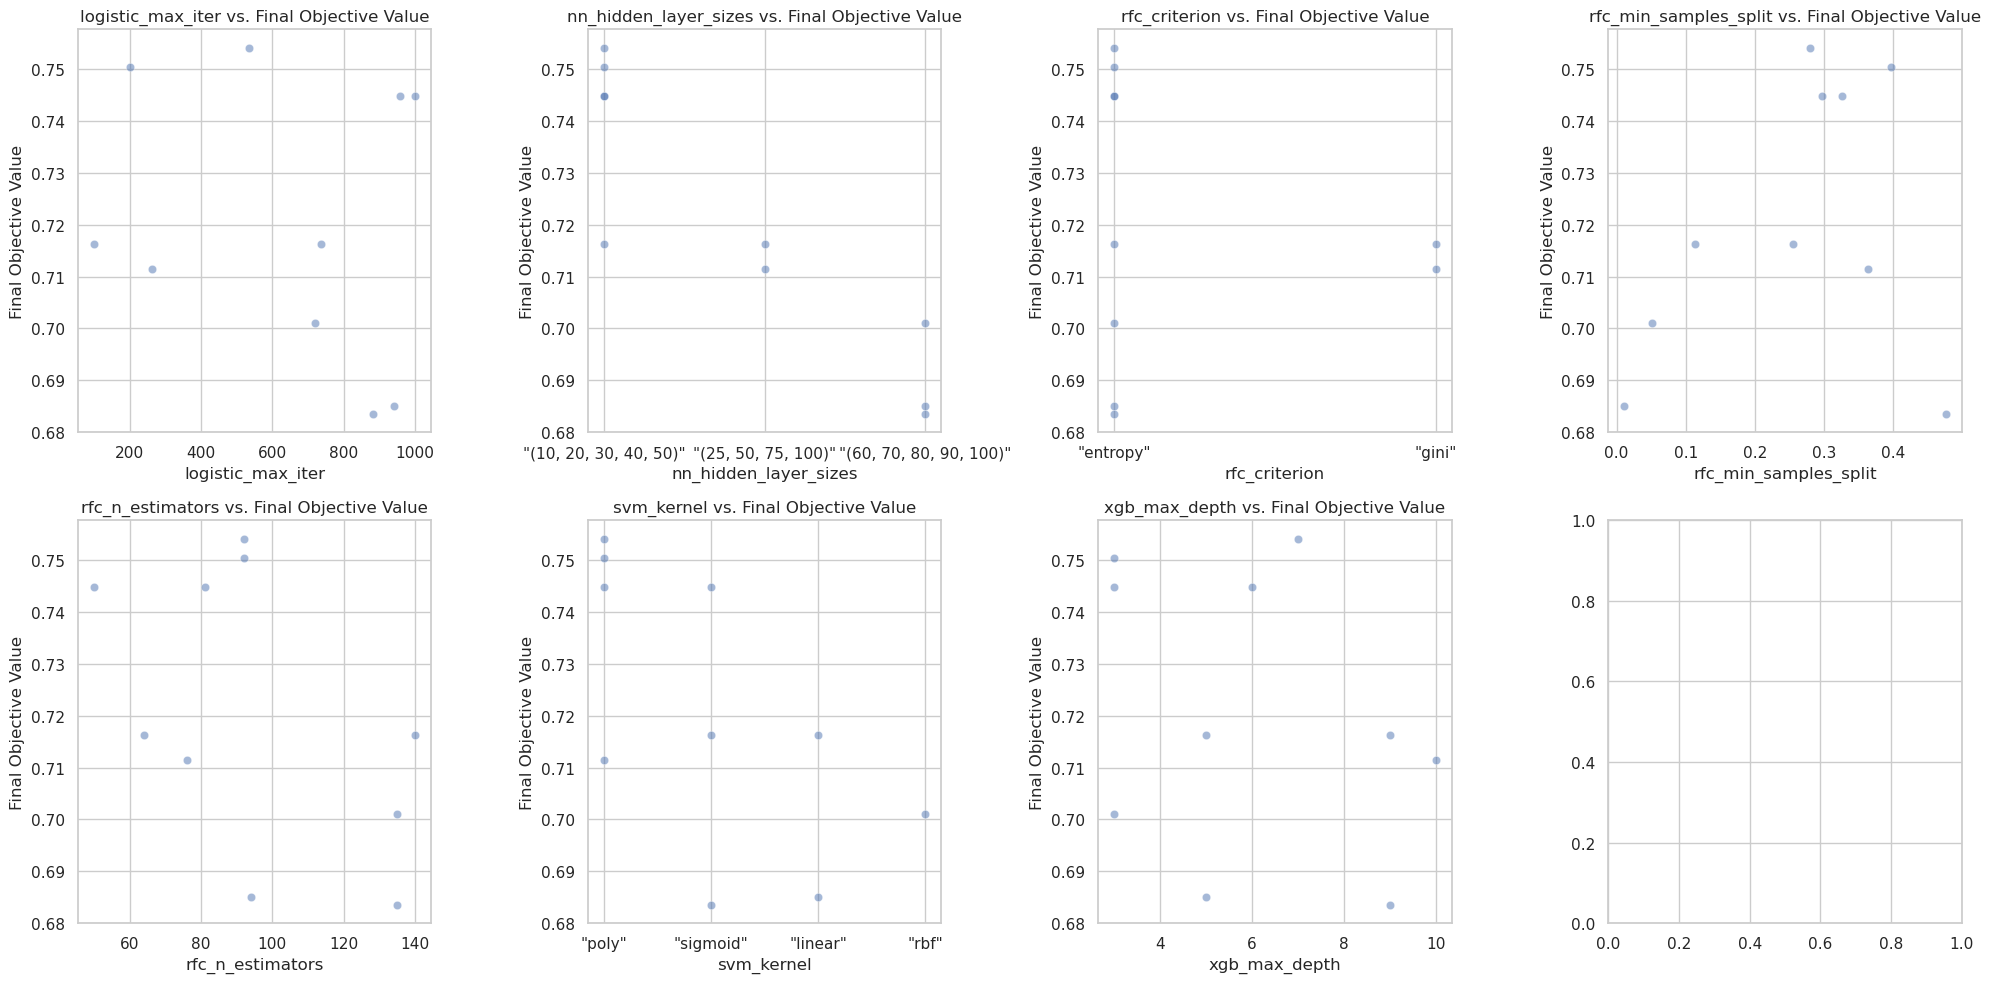

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plots
sns.set(style="whitegrid")
hyperparameters = tuning_metrics[['logistic_max_iter', 'nn_hidden_layer_sizes', 'rfc_criterion', 'rfc_min_samples_split', 'rfc_n_estimators', 'svm_kernel', 'xgb_max_depth']]
# Plot hyperparameters versus objective metric using Seaborn
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = axes.flatten()

for i, (hyperparameter, ax) in enumerate(zip(hyperparameters.columns, axes)):
    sns.scatterplot(data=tuning_metrics, x=hyperparameter, y='FinalObjectiveValue', ax=ax, alpha=0.5)
    ax.set_xlabel(hyperparameter)
    ax.set_ylabel('Final Objective Value')
    ax.set_title(f'{hyperparameter} vs. Final Objective Value')

plt.tight_layout()
plt.show()

In [41]:
tuning_metrics.columns

Index(['logistic_max_iter', 'nn_hidden_layer_sizes', 'rfc_criterion',
       'rfc_min_samples_split', 'rfc_n_estimators', 'svm_kernel',
       'xgb_max_depth', 'TrainingJobName', 'TrainingJobStatus',
       'FinalObjectiveValue', 'TrainingStartTime', 'TrainingEndTime',
       'TrainingElapsedTimeSeconds'],
      dtype='object')